In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


In [2]:
# Load the dataset (Assume you've downloaded and placed it in the same directory)
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first few rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Drop irrelevant columns (like EmployeeNumber, Over18, StandardHours)
df = df.drop(columns=['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'])

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separate features and target variable for both linear and logistic regression
X = df.drop(columns=['Attrition', 'MonthlyIncome', 'JobSatisfaction'])
y_logistic = df['Attrition']  # Target for logistic regression (attrition prediction)
y_linear = df['MonthlyIncome']  # Target for linear regression (income prediction)

# Train-test split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_logistic, test_size=0.3, random_state=42)
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y_linear, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train_log)
X_test_log = scaler.transform(X_test_log)
X_train_lin = scaler.fit_transform(X_train_lin)
X_test_lin = scaler.transform(X_test_lin)


Linear Regression RMSE: 1461.9922820503193
Linear Regression R-squared: 0.8943195526962997


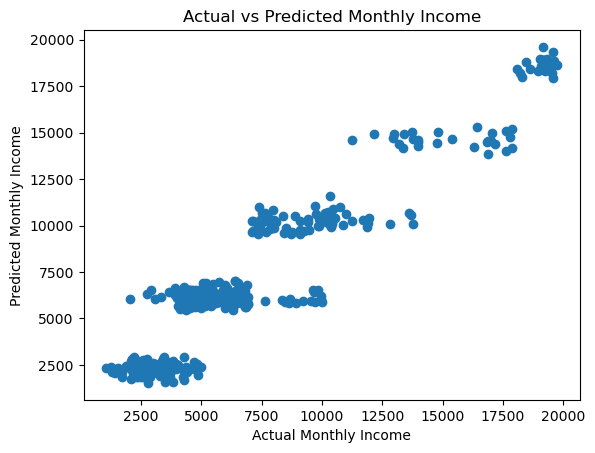

In [4]:
# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_lin, y_train_lin)

# Predict on test set
y_pred_lin = lin_reg.predict(X_test_lin)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_lin, y_pred_lin))
r2 = r2_score(y_test_lin, y_pred_lin)

print(f'Linear Regression RMSE: {rmse}')
print(f'Linear Regression R-squared: {r2}')

# Plot the predicted vs actual values
plt.scatter(y_test_lin, y_pred_lin)
plt.xlabel("Actual Monthly Income")
plt.ylabel("Predicted Monthly Income")
plt.title("Actual vs Predicted Monthly Income")
plt.show()

Logistic Regression Accuracy: 0.8684807256235828
Logistic Regression ROC-AUC: 0.7540552200172561

Confusion Matrix:
 [[369  11]
 [ 47  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.56      0.23      0.33        61

    accuracy                           0.87       441
   macro avg       0.72      0.60      0.63       441
weighted avg       0.84      0.87      0.84       441



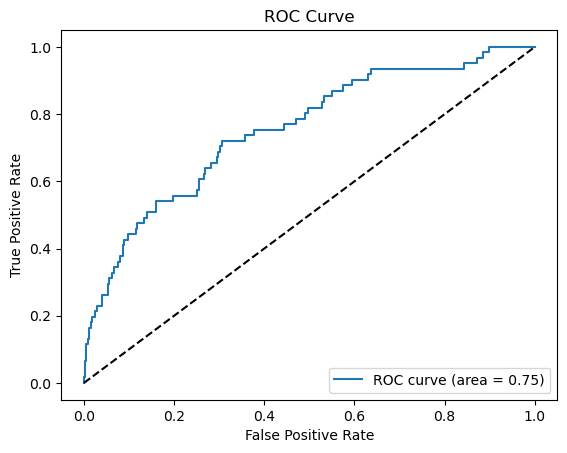

In [5]:
# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_log, y_train_log)

# Predict on test set
y_pred_log = log_reg.predict(X_test_log)
y_pred_prob = log_reg.predict_proba(X_test_log)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test_log, y_pred_log)
roc_auc = roc_auc_score(y_test_log, y_pred_prob)
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
class_report = classification_report(y_test_log, y_pred_log)

print(f'Logistic Regression Accuracy: {accuracy}')
print(f'Logistic Regression ROC-AUC: {roc_auc}')
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test_log, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

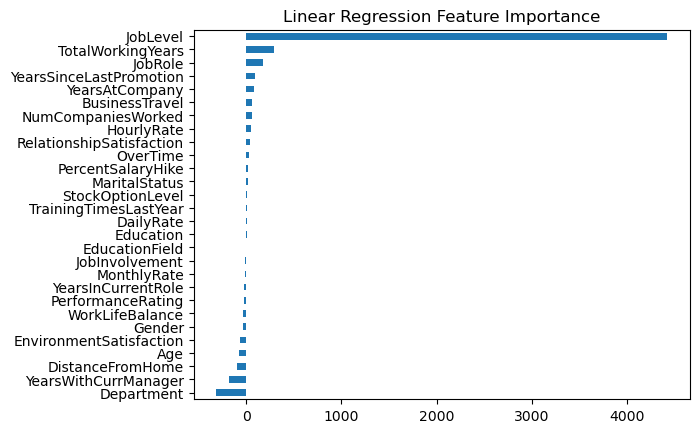

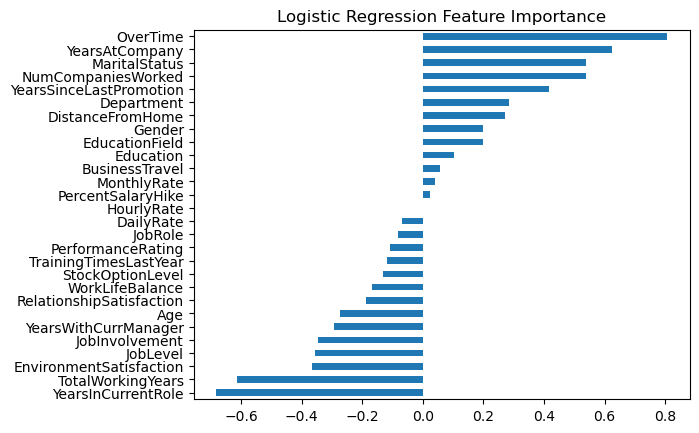

In [6]:
# Linear Regression Feature Importance (Coefficients)
coefficients = pd.Series(lin_reg.coef_, index=X.columns)
coefficients.sort_values().plot(kind='barh')
plt.title("Linear Regression Feature Importance")
plt.show()

# Logistic Regression Feature Importance (Coefficients)
coefficients_log = pd.Series(log_reg.coef_[0], index=X.columns)
coefficients_log.sort_values().plot(kind='barh')
plt.title("Logistic Regression Feature Importance")
plt.show()